**Nama : Lhedya Monica Ismon<BR>
Bootcamp: Data Science and Analyst 35<BR>
Final Project Data Analyst : Customer Segmentation (RFM)- E-Commerce Sales Dataset**

# Import Libraries

In [ ]:
import pandas as pd # Import pandas untuk manipulasi data dan menggunakan DataFrame
import numpy as np # Digunakan untuk operasi matematika dan numerik
import seaborn as sns # Berfungsi untuk visualisasi data dan membuat grafik
import matplotlib.pyplot as plt # Berfungsi untuk visualisasi data secara langsung

pd.set_option('display.max_columns', None) # Konfigurasi data agar tampilan kolom tidak terpotong

# Load Data

In [ ]:
df = pd.read_csv('/content/global_ecommerce_sales.csv')

# Preliminary

In [ ]:
# Menampilkan keseluruhan data
df

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method
0,2022-10-21,CUST_32167,Asia,Product_8109,Fashion,805.51,4,3.63,3105.08,Cash
1,2022-07-25,CUST_79483,Europe,Product_7873,Books,92.96,1,1.83,91.26,Cash
2,2023-08-24,CUST_97186,Europe,Product_9334,Home & Kitchen,700.87,3,21.86,1642.98,PayPal
3,2023-11-23,CUST_50953,Asia,Product_1364,Electronics,507.21,3,14.67,1298.41,Credit Card
4,2022-04-11,CUST_43293,Europe,Product_9899,Toys & Games,985.92,5,26.19,3638.54,PayPal
...,...,...,...,...,...,...,...,...,...,...
499995,2022-02-10,CUST_85621,Africa,Product_6,Sports & Outdoors,613.63,3,15.10,1562.92,Credit Card
499996,2022-11-04,CUST_22256,South America,Product_3590,Fashion,922.67,5,13.06,4010.85,PayPal
499997,2023-11-06,CUST_74548,Europe,Product_4291,Fashion,684.41,2,16.87,1137.90,Crypto
499998,2023-07-07,CUST_93833,Australia,Product_4840,Books,373.51,3,19.48,902.25,Crypto


In [ ]:
# Menampilkan 5 data teratas
df.head()

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method
0,2022-10-21,CUST_32167,Asia,Product_8109,Fashion,805.51,4,3.63,3105.08,Cash
1,2022-07-25,CUST_79483,Europe,Product_7873,Books,92.96,1,1.83,91.26,Cash
2,2023-08-24,CUST_97186,Europe,Product_9334,Home & Kitchen,700.87,3,21.86,1642.98,PayPal
3,2023-11-23,CUST_50953,Asia,Product_1364,Electronics,507.21,3,14.67,1298.41,Credit Card
4,2022-04-11,CUST_43293,Europe,Product_9899,Toys & Games,985.92,5,26.19,3638.54,PayPal


In [ ]:
# Menambilkan 5 data terakhir
df.tail()

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method
499995,2022-02-10,CUST_85621,Africa,Product_6,Sports & Outdoors,613.63,3,15.10,1562.92,Credit Card
499996,2022-11-04,CUST_22256,South America,Product_3590,Fashion,922.67,5,13.06,4010.85,PayPal
499997,2023-11-06,CUST_74548,Europe,Product_4291,Fashion,684.41,2,16.87,1137.90,Crypto
499998,2023-07-07,CUST_93833,Australia,Product_4840,Books,373.51,3,19.48,902.25,Crypto
499999,2023-01-18,CUST_73252,South America,Product_9705,Home & Kitchen,603.55,5,29.31,2133.25,Cash


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction Date  500000 non-null  object 
 1   Customer ID       500000 non-null  object 
 2   Region            500000 non-null  object 
 3   Product           500000 non-null  object 
 4   Category          500000 non-null  object 
 5   Price             500000 non-null  float64
 6   Quantity          500000 non-null  int64  
 7   Discount (%)      500000 non-null  float64
 8   Total Revenue     500000 non-null  float64
 9   Payment Method    500000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 38.1+ MB


In [ ]:
# Menampilkan statistika dasar data numerik
df.describe()

,Price,Quantity,Discount (%),Total Revenue
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,502.732868,3.001728,14.973566,1282.473695
std,286.922294,1.414259,8.667876,1022.572960
min,5.000000,1.000000,0.000000,3.580000
25%,254.980000,2.000000,7.450000,469.740000
50%,502.300000,3.000000,14.980000,993.315000
75%,751.260000,4.000000,22.470000,1890.542500
max,999.990000,5.000000,30.000000,4988.910000


In [ ]:
# Menampilkan statistika dasar kolom kategorikal
df.describe(include='object')

,Transaction Date,Customer ID,Region,Product,Category,Payment Method
count,500000,500000,500000,500000,500000,500000
unique,731,98348,6,10000,8,5
top,2022-08-11,CUST_21166,Asia,Product_3185,Toys & Games,Bank Transfer
freq,758,16,83770,80,62779,100622


# Data Clening

## Duplicate Check

In [ ]:
# Cek duplicate
df.duplicated().sum()

np.int64(0)

## Missing Value Cheak

In [ ]:
# Cek missing values
df.isnull().sum()

,0
Transaction Date,0
Customer ID,0
Region,0
Product,0
Category,0
Price,0
Quantity,0
Discount (%),0
Total Revenue,0
Payment Method,0


## Outlier Check

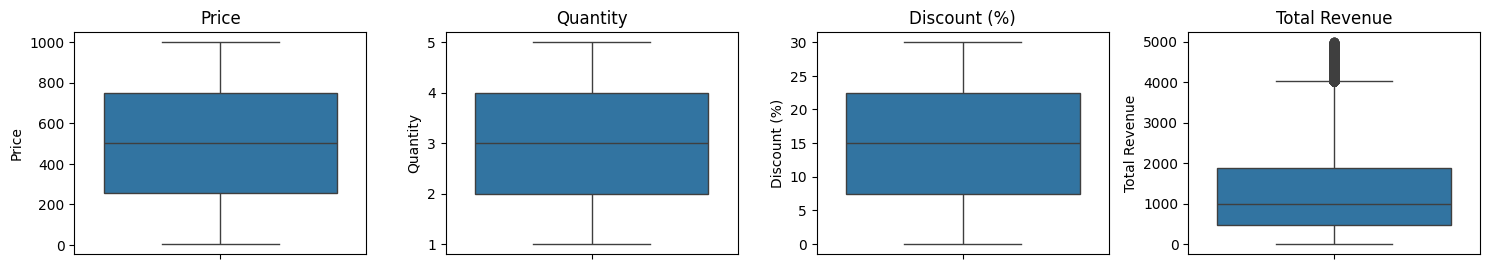

In [ ]:
# Melihat nilai outlier
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Outlier pada total Revenue tidak dihapus karena itu bukan error data, melainkan karakteristik penting yang justru menjadi dasar segmentasi pelanggan.

In [ ]:
# Mengecek kembali data
df.sample(10)

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method
353743,2023-07-30,CUST_36371,Australia,Product_368,Health & Beauty,789.57,1,13.65,681.79,Crypto
364787,2023-06-21,CUST_63070,Europe,Product_2880,Automotive,303.95,4,17.33,1005.10,Cash
236804,2022-11-18,CUST_97124,Europe,Product_9979,Electronics,399.25,5,3.37,1928.98,PayPal
280200,2022-12-24,CUST_9535,South America,Product_1636,Automotive,558.72,5,19.48,2249.41,Cash
317523,2022-04-15,CUST_46980,Europe,Product_2626,Sports & Outdoors,919.79,4,24.96,2760.84,PayPal
184816,2022-01-04,CUST_75751,Africa,Product_4874,Health & Beauty,837.14,4,15.11,2842.59,Credit Card
335433,2023-09-05,CUST_51999,Australia,Product_9244,Health & Beauty,547.45,3,22.54,1272.16,Cash
121880,2022-09-11,CUST_52375,Africa,Product_6276,Health & Beauty,469.61,3,13.73,1215.40,PayPal
403367,2022-02-12,CUST_61280,North America,Product_7872,Fashion,361.93,1,3.26,350.13,Bank Transfer
427294,2023-09-27,CUST_47870,North America,Product_5851,Automotive,473.98,3,23.00,1094.89,Cash


# Data Manipulation

## Mengubah tanggal dalam format datetime

In [ ]:
# Mengubah dari object ke format datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format="%Y-%m-%d")

## Menambahkan Kolom Total Spend

In [ ]:
# Menambahkan kolom TotalSpend
df['TotalSpend'] = df['Quantity'] * df['Price']

## Agregasi Data Per Pelanggan

In [ ]:
# Total pengeluaran pada setiap pelanggan

customer_total = df.groupby('Customer ID')['TotalSpend'].sum().reset_index()
customer_total.rename(columns={'TotalSpend': 'TotalSpent'}, inplace=True)
print("Total pengeluaran pada setiap pelanggan:")
display(customer_total.head())

Total pengeluaran pada setiap pelanggan:


,Customer ID,TotalSpent
0,CUST_1000,2927.00
1,CUST_10000,5656.45
2,CUST_10001,9363.50
3,CUST_10002,13528.98
4,CUST_10003,5714.26


In [ ]:
# Frekuensi Pembelian pada setiap pelanggan

customer_frequency = df.groupby('Customer ID')['Transaction Date'].count().reset_index()
customer_frequency.rename(columns={'Transaction Date': 'TransactionDateFrequency'}, inplace=True)
print("\nFrekuensi pembelian pada setiap pelanggan:")
display(customer_frequency.head())


Frekuensi pembelian pada setiap pelanggan:


,Customer ID,TransactionDateFrequency
0,CUST_1000,3
1,CUST_10000,6
2,CUST_10001,5
3,CUST_10002,8
4,CUST_10003,4


## Feature Engineering (RFM)

In [ ]:
# Menentukan snapshot_date (hari terakhir data + 1)

snapshot_date = df['Transaction Date'].max()
snapshot_date = pd.to_datetime(snapshot_date) + pd.Timedelta(days=1)

In [ ]:
# Menghitung recency
recency_df = df.groupby('Customer ID')['Transaction Date'].max().reset_index()
recency_df.columns = ['Customer ID', 'Transaction Date']
recency_df['Recency'] = (snapshot_date - recency_df['Transaction Date']).dt.days

print("Recency calculation results:")
display(recency_df.head())

Recency calculation results:


,Customer ID,Transaction Date,Recency
0,CUST_1000,2023-08-26,129
1,CUST_10000,2023-05-15,232
2,CUST_10001,2023-09-28,96
3,CUST_10002,2023-09-10,114
4,CUST_10003,2022-07-06,545


In [ ]:
# Menghitung Frequency
frequency_df = df.groupby('Customer ID').size().reset_index(name='Frequency')

print("\nFrequency calculation results:")
display(frequency_df.head())


Frequency calculation results:


,Customer ID,Frequency
0,CUST_1000,3
1,CUST_10000,6
2,CUST_10001,5
3,CUST_10002,8
4,CUST_10003,4


In [ ]:
# Menghitung Monetary

monetary_df = df.groupby('Customer ID')['TotalSpend'].sum().reset_index()
monetary_df.columns = ['Customer ID', 'Monetary']

print("\nMonetary calculation results:")
display(monetary_df.head())


Monetary calculation results:


,Customer ID,Monetary
0,CUST_1000,2927.00
1,CUST_10000,5656.45
2,CUST_10001,9363.50
3,CUST_10002,13528.98
4,CUST_10003,5714.26


In [ ]:
# Gabungkan
# Gabungkan recency_df dan frequency_df
rfm_df = recency_df.merge(frequency_df, on='Customer ID', how='left')

# Gabungkan rfm_df dengan monetary_df
rfm_df = rfm_df.merge(monetary_df, on='Customer ID', how='left').fillna(0)

# Hapus kolom Transaction Date karena tidak lagi diperlukan
rfm_df = rfm_df.drop('Transaction Date', axis=1)

print("\nCombined RFM DataFrame:")
display(rfm_df.head())


Combined RFM DataFrame:


,Customer ID,Recency,Frequency,Monetary
0,CUST_1000,129,3,2927.00
1,CUST_10000,232,6,5656.45
2,CUST_10001,96,5,9363.50
3,CUST_10002,114,8,13528.98
4,CUST_10003,545,4,5714.26


In [ ]:
# Memberi skor RFM
# Recency, skor yang lebih rendah lebih baik
# frequency dan monetary, skor yang lebih tinggi lebih baik (lebih sering)

# menentukan jumlah kuartil
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([.25, .5, .75]).to_dict()

# fungsi untuk memberikan skor R
def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.5]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

# Fungsi untuk memberikan skor R dan M
def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.5]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

# Menerapkan fungsi scoring ke dalam dataframe
rfm_df['R_score'] = rfm_df['Recency'].apply(lambda x: r_score(x))
rfm_df['F_score'] = rfm_df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm_df['M_score'] = rfm_df['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

print("\nRFM DataFrame with Scores:")
display(rfm_df.head())


RFM DataFrame with Scores:


,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,CUST_1000,129,3,2927.00,2,1,1
1,CUST_10000,232,6,5656.45,1,3,2
2,CUST_10001,96,5,9363.50,3,2,3
3,CUST_10002,114,8,13528.98,2,4,4
4,CUST_10003,545,4,5714.26,1,2,2


In [ ]:
# menggabungkan skor R, F, dan M untuk membuat skor RFM total
# mengubah skor menjadi string dan menggabungkannya

rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

print("\nRFM DataFrame with RFM Scores:")
display(rfm_df.head())


RFM DataFrame with RFM Scores:


,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,CUST_1000,129,3,2927.00,2,1,1,211
1,CUST_10000,232,6,5656.45,1,3,2,132
2,CUST_10001,96,5,9363.50,3,2,3,323
3,CUST_10002,114,8,13528.98,2,4,4,244
4,CUST_10003,545,4,5714.26,1,2,2,122


In [ ]:
# Menampilkan statistika dasar tabel rfm_df
rfm_df.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score
count,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.00000
mean,140.415443,5.083987,7669.112789,2.506508,2.390267,2.50000
std,132.100696,2.217248,4288.502007,1.121626,1.111544,1.11804
min,1.000000,1.000000,7.020000,1.000000,1.000000,1.00000
25%,42.000000,3.000000,4454.265000,2.000000,1.000000,1.75000
50%,100.000000,5.000000,7137.085000,3.000000,2.000000,2.50000
75%,198.000000,6.000000,10281.950000,4.000000,3.000000,3.25000
max,731.000000,16.000000,35517.150000,4.000000,4.000000,4.00000


In [ ]:
print(rfm_df[rfm_df['Monetary']< 0])

Empty DataFrame
Columns: [Customer ID, Recency, Frequency, Monetary, R_score, F_score, M_score, RFM_Score]
Index: []


# Exploratory Data Analisis

## Customer Segmentation

In [ ]:
def assign_segment(row):
    r = row['R_score']
    f = row['F_score']
    m = row['M_score']

    # Champions: semua skor tinggi
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    # Loyal: mostly tinggi, minimal 3 pada semuanya
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal'
    # Potential: skor recency cukup tinggi, other skor minimal 2
    elif r >= 3 and f >= 2 and m >= 2:
        return 'Potential'
    # At Risk: recency rendah, tapi frekuensi atau monetary mulai tinggi
    elif r <= 2 and (f >= 3 or m >= 3):
        return 'At Risk'
    # Hibernating: semua skor rendah (1-2), ini pelanggan pasif
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    # Lost: skor paling rendah, kemungkinan sudah hilang, bisa 1 semua
    elif r == 1 and f == 1 and m == 1:
        return 'Lost'
    else:
        return 'Other'

# Terapkan segmentasi ke dataframe
rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

# Tampilkan sample data dan distribusi segmen
print(rfm_df[['Customer ID','R_score','F_score','M_score','Segment']].head(10))

print("\nDistribusi Segmentasi:")
segment_table = rfm_df['Segment'].value_counts().reset_index()
segment_table.columns = ['Segment', 'Jumlah_User']
display(segment_table)


  Customer ID  R_score  F_score  M_score      Segment
0   CUST_1000        2        1        1  Hibernating
1  CUST_10000        1        3        2      At Risk
2  CUST_10001        3        2        3    Potential
3  CUST_10002        2        4        4      At Risk
4  CUST_10003        1        2        2  Hibernating
5  CUST_10004        4        2        4    Potential
6  CUST_10005        3        2        2    Potential
7  CUST_10006        2        4        4      At Risk
8  CUST_10007        2        3        4      At Risk
9  CUST_10008        3        1        1        Other

Distribusi Segmentasi:


,Segment,Jumlah_User
0,Hibernating,26921
1,At Risk,22066
2,Potential,16510
3,Loyal,15391
4,Other,11152
5,Champions,6308


In [ ]:
# Tabel detail per Customer ID
detail_table = rfm_df[['Customer ID','Recency','Frequency','Monetary',
                       'R_score','F_score','M_score','RFM_Score','Segment']]

display(detail_table.head(10))   # tampilkan 10 baris pertama


,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,CUST_1000,129,3,2927.00,2,1,1,211,Hibernating
1,CUST_10000,232,6,5656.45,1,3,2,132,At Risk
2,CUST_10001,96,5,9363.50,3,2,3,323,Potential
3,CUST_10002,114,8,13528.98,2,4,4,244,At Risk
4,CUST_10003,545,4,5714.26,1,2,2,122,Hibernating
5,CUST_10004,12,5,13070.69,4,2,4,424,Potential
6,CUST_10005,87,5,6695.79,3,2,2,322,Potential
7,CUST_10006,115,7,11671.87,2,4,4,244,At Risk
8,CUST_10007,126,6,11632.22,2,3,4,234,At Risk
9,CUST_10008,67,2,751.11,3,1,1,311,Other


In [ ]:
# Melihat jumlah user pada tabel 'R_score'
detail_table['R_score'].value_counts()

,count
R_score,
4,25012
1,24559
2,24428
3,24349


In [ ]:
# Melihat jumlah user pada tabel 'F_score'
detail_table['F_score'].value_counts()

,count
F_score,
2,34530
1,24830
4,24224
3,14764


In [ ]:
# Melihat jumlah user pada tabel 'M_score'
detail_table['M_score'].value_counts()

,count
M_score,
1,24587
2,24587
3,24587
4,24587


In [ ]:
detail_table['RFM_Score'].value_counts()

,count
RFM_Score,
111,8585
444,6308
344,4931
244,3610
211,3579
...,...
114,38
314,27
141,25


In [ ]:
# Ringkasan jumlah user tiap segmen
summary_table = rfm_df.groupby('Segment').agg(
    Jumlah_User=('Customer ID','count'),
    Avg_Recency=('Recency','mean'),
    Avg_Frequency=('Frequency','mean'),
    Avg_Monetary=('Monetary','mean')
).reset_index()

display(summary_table)


,Segment,Jumlah_User,Avg_Recency,Avg_Frequency,Avg_Monetary
0,At Risk,22066,195.144884,6.034306,10047.208739
1,Champions,6308,20.015853,8.565631,14456.836744
2,Hibernating,26921,270.939712,3.102411,3882.033406
3,Loyal,15391,51.872978,7.204795,11201.399530
4,Other,11152,47.831779,3.278874,3774.562856
5,Potential,16510,45.517020,4.956996,7410.271590


In [ ]:
# Tampilkan tabel detail dulu
display(detail_table)

# Lalu di bawahnya tampilkan ringkasan segmen
print("\nRingkasan Jumlah User per Segmen:")
display(summary_table)


,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,CUST_1000,129,3,2927.00,2,1,1,211,Hibernating
1,CUST_10000,232,6,5656.45,1,3,2,132,At Risk
2,CUST_10001,96,5,9363.50,3,2,3,323,Potential
3,CUST_10002,114,8,13528.98,2,4,4,244,At Risk
4,CUST_10003,545,4,5714.26,1,2,2,122,Hibernating
...,...,...,...,...,...,...,...,...,...
98343,CUST_99995,11,3,3909.64,4,1,1,411,Other
98344,CUST_99996,214,4,9483.56,1,2,3,123,At Risk
98345,CUST_99997,56,7,12139.85,3,4,4,344,Loyal
98346,CUST_99998,453,2,2507.53,1,1,1,111,Hibernating



Ringkasan Jumlah User per Segmen:


,Segment,Jumlah_User,Avg_Recency,Avg_Frequency,Avg_Monetary
0,At Risk,22066,195.144884,6.034306,10047.208739
1,Champions,6308,20.015853,8.565631,14456.836744
2,Hibernating,26921,270.939712,3.102411,3882.033406
3,Loyal,15391,51.872978,7.204795,11201.399530
4,Other,11152,47.831779,3.278874,3774.562856
5,Potential,16510,45.517020,4.956996,7410.271590


In [ ]:
# Recency Score (jumlah hari/recency cutoff) setiap skor
recency_cutoffs = detail_table.groupby('R_score')['Recency'].max().sort_index(ascending=False)
print("Recency Cutoff days per Recency Score")
print(recency_cutoffs)


Recency Cutoff days per Recency Score
R_score
4     42
3    100
2    198
1    731
Name: Recency, dtype: int64


In [ ]:
# Frequency Score (jumlah transaksi) setiap skor
frequency_cutoffs = detail_table.groupby('F_score')['Frequency'].min().sort_index()
print("Frequency Cutoff (minimum transactions) per Frequency Score")
print(frequency_cutoffs)


Frequency Cutoff (minimum transactions) per Frequency Score
F_score
1    1
2    4
3    6
4    7
Name: Frequency, dtype: int64


In [ ]:
# Monetary Score (nilai pembelian) setiap skor
monetary_cutoffs = detail_table.groupby('M_score')['Monetary'].min().sort_index()
print("Monetary Cutoff (minimum spend) per Monetary Score")
print(monetary_cutoffs)


Monetary Cutoff (minimum spend) per Monetary Score
M_score
1        7.02
2     4454.27
3     7137.13
4    10282.07
Name: Monetary, dtype: float64


## Discount berdasarkan category product

In [ ]:
# Explorasikan rata-rata diskon per kategori
discount_per_category = df.groupby('Category')['Discount (%)'].mean().reset_index()

print("\nRata-rata Diskon per Kategori:")
display(discount_per_category.sort_values(by='Discount (%)', ascending=False))


Rata-rata Diskon per Kategori:


,Category,Discount (%)
6,Sports & Outdoors,15.000838
1,Books,14.991454
2,Electronics,14.988576
4,Health & Beauty,14.984680
5,Home & Kitchen,14.965473
0,Automotive,14.964474
3,Fashion,14.953113
7,Toys & Games,14.939994


/tmp/ipython-input-4074018924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Discount (%)',


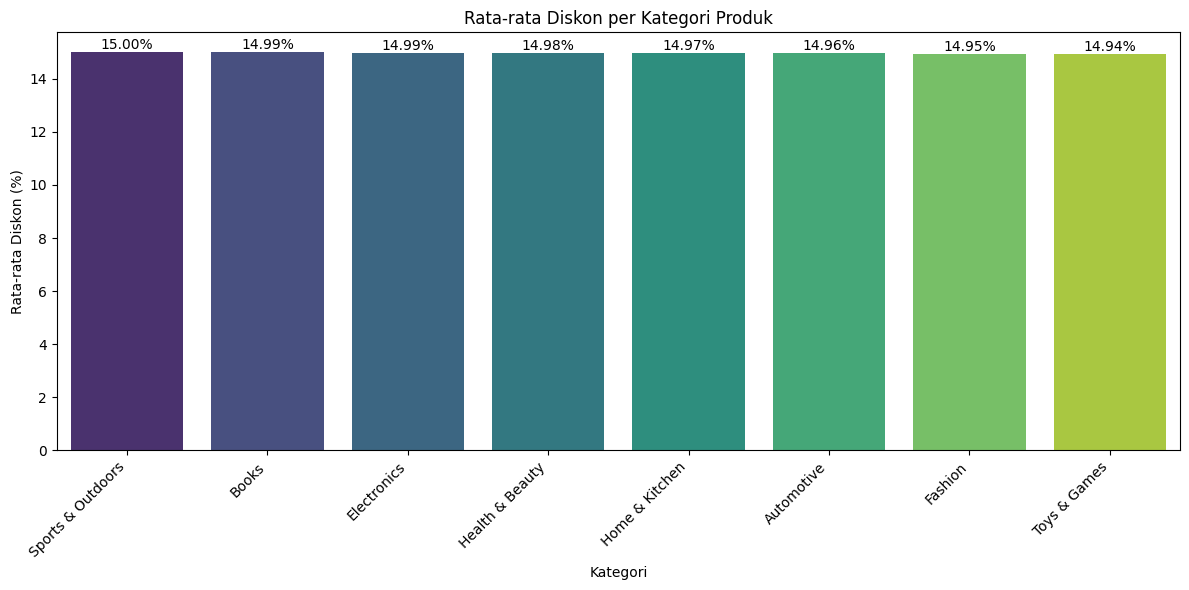

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Category', y='Discount (%)',
                 data=discount_per_category.sort_values(by='Discount (%)', ascending=False),
                 palette='viridis')
plt.title('Rata-rata Diskon per Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Diskon (%)')
plt.xticks(rotation=45, ha='right')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            f'{height:.2f}%',  # format label dengan 2 desimal dan tanda persen
            ha='center', va='bottom')

plt.tight_layout()
plt.show()


Insight:<br>Dapat dilihat dari visualisasi bahwa rata-rata discount untuk semua kategori produk hampir sama, berkisar antara 14-15% dengan perbedaan kecil antara setiap kategori. Kategori produk dengan discount tertinggi yaitu sport & outdoors.<br>


-  Dari perbedaan rata-rata discount antara ketegori produk yang sangat kecil menunjukkan strategi discount yang diterapkan cukup merata pada setiap produk dan discount tidak menjadi faktor utama membedakan strategi pemasaran anatara kategori dalam data.

## Total Revenue per Category

In [ ]:
# Explorasikan  total revenue per kategori
revenue_per_category = df.groupby('Category')['Total Revenue'].sum().reset_index()

print("\nTotal revenue per Kategori:")
display(revenue_per_category.sort_values(by='Total Revenue', ascending=False))


Total revenue per Kategori:


,Category,Total Revenue
7,Toys & Games,80744352.97
1,Books,80590884.99
2,Electronics,80161406.63
0,Automotive,80048411.70
5,Home & Kitchen,80029883.12
3,Fashion,79989184.80
6,Sports & Outdoors,79846454.76
4,Health & Beauty,79826268.48


/tmp/ipython-input-3204868791.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Total Revenue',


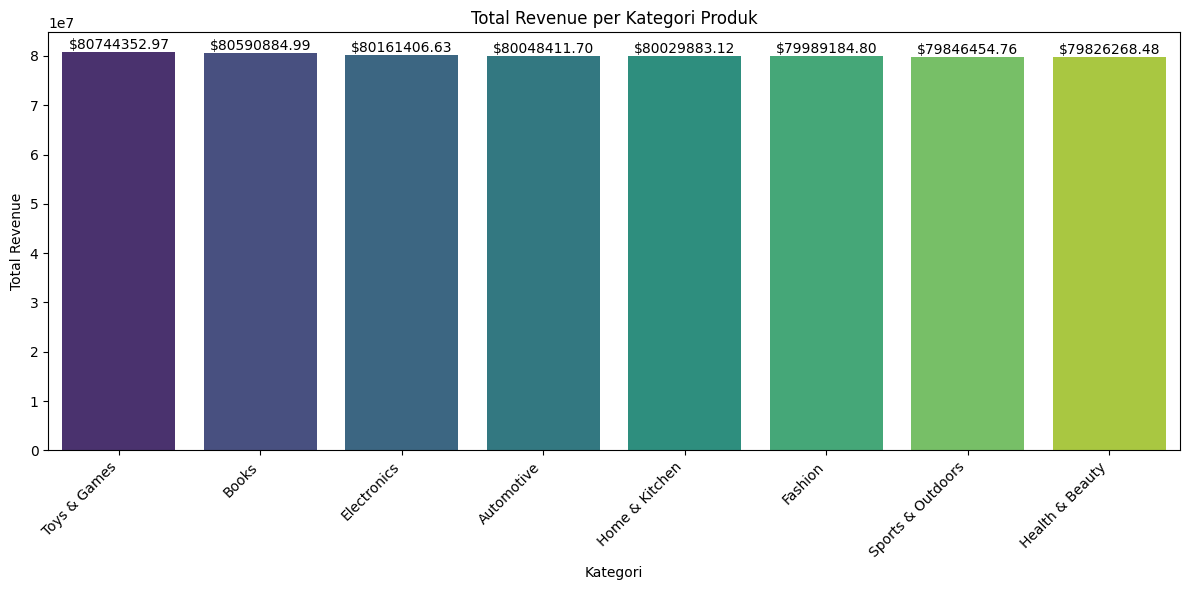

In [ ]:
# visualisasi Total Revevue per category

plt.figure(figsize=(12,6))
ax = sns.barplot(x='Category', y='Total Revenue',
                 data=revenue_per_category.sort_values(by='Total Revenue', ascending=False), palette='viridis')
plt.title('Total Revenue per Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            f'${height:.2f}',  # format label dengan 2 desimal dan tanda dollar
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

Insight:<br>Berdasarkan visualisasi yang ditampilkan terlihat bahwa kategori produk dengan total revenue tertinggi yaitu pada toys & games dan apabila di hubungkan dengan discount per kategory dapat disimpulkan bahwa perberian discount tidak memberikan pengaruh kepada revenue yang dihasilkan. Kategori tous & games dengan discount terendah tetapi mentumbangkan total revenue tertinggi.

## Distribusi Category dan Payment Method

In [ ]:
# Membuat crosstab antara Category dan Payment Method
category_payment_crosstab = pd.crosstab(df['Category'], df['Payment Method'])

print("Crosstab: Category vs Payment Method")
display(category_payment_crosstab)

Crosstab: Category vs Payment Method


Payment Method,Bank Transfer,Cash,Credit Card,Crypto,PayPal
Category,,,,,
Automotive,12704,12468,12690,12178,12358
Books,12629,12395,12542,12545,12435
Electronics,12474,12507,12660,12587,12354
Fashion,12487,12445,12408,12380,12581
Health & Beauty,12533,12524,12474,12444,12511
Home & Kitchen,12609,12538,12322,12550,12473
Sports & Outdoors,12580,12378,12506,12481,12471
Toys & Games,12606,12501,12575,12457,12640


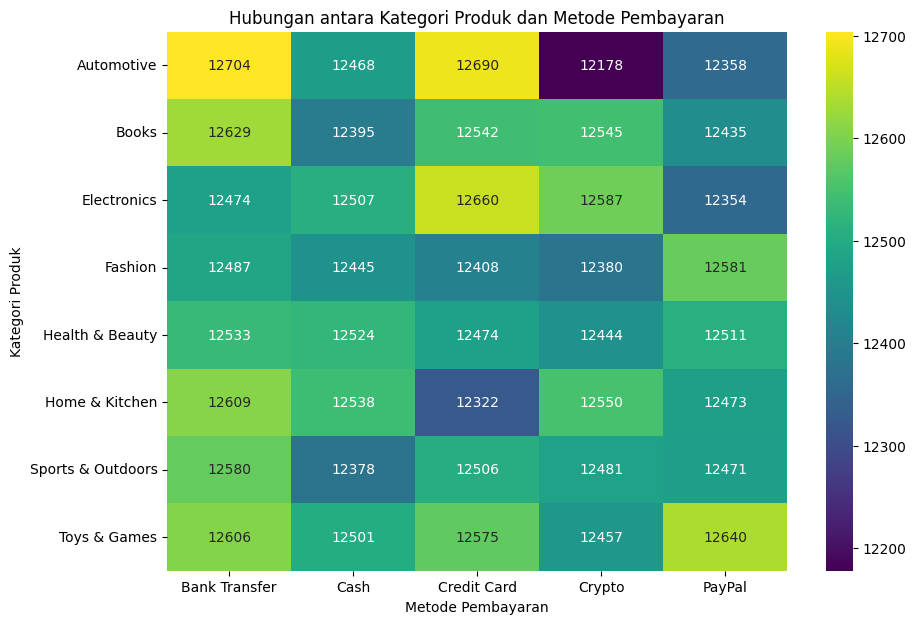

In [ ]:
# Visualisasi crosstab menggunakan heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(category_payment_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Hubungan antara Kategori Produk dan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Kategori Produk')
plt.show()

Insight:<br>Bedasarkan visualisasi dapat dilihat jumlah transaksi untuk setiap kombinasi kategori produk dan metode pembayaran terlihat relatif merata. Tidak ada sel (kombinasi kategori dan metode pembayaran) yang memiliki jumlah transaksi jauh lebih tinggi atau jauh lebih rendah dibandingkan sel lainnya. Ini ditunjukkan oleh warna pada heatmap yang cenderung seragam.<br>

- Ini menunjukkan bahwa tidak ada korelasi yang signifikan antara jenis produk yang dibeli dan metode pembayaran yang digunakan oleh pelanggan dalam data

## Region vs Total Revenue

In [ ]:
# Menghitung Total Revenue per Region
revenue_per_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

print("Total Revenue per Region:")
display(revenue_per_region.sort_values(by='Total Revenue', ascending=False))

Total Revenue per Region:


,Region,Total Revenue
1,Asia,1.074152e+08
2,Australia,1.069895e+08
4,North America,1.068893e+08
3,Europe,1.068716e+08
0,Africa,1.065545e+08
5,South America,1.065168e+08


/tmp/ipython-input-3111597854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Region', y='Total Revenue', data=revenue_per_region.sort_values(by='Total Revenue', ascending=False), palette='viridis')


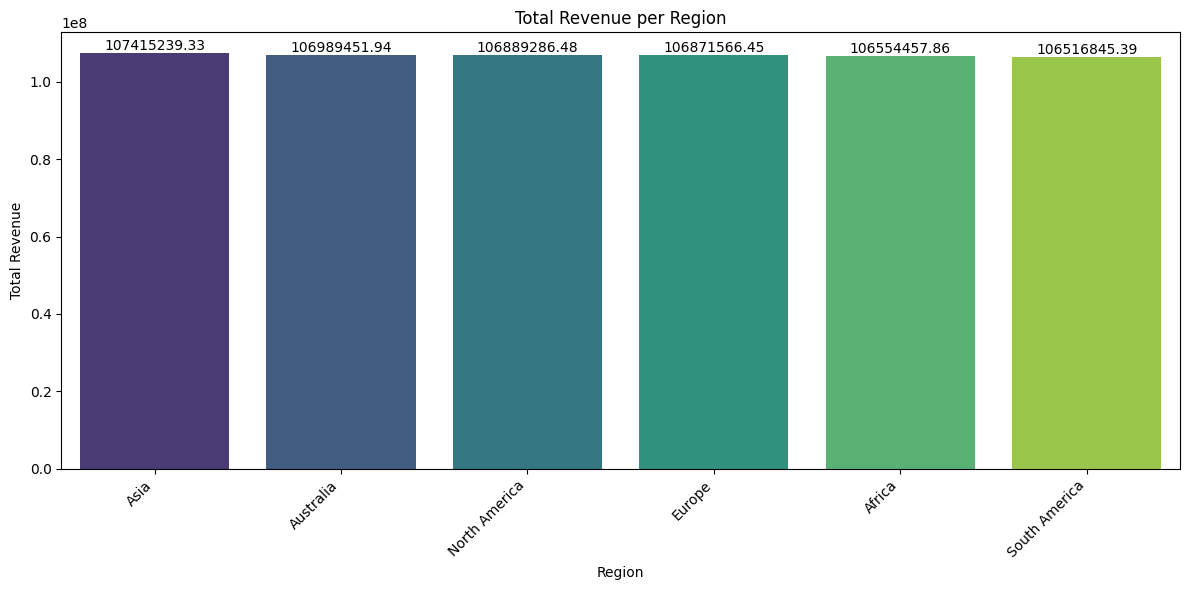

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Region', y='Total Revenue', data=revenue_per_region.sort_values(by='Total Revenue', ascending=False), palette='viridis')
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            f'{height:.2f}',  # format label dengan 2 desimal
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

Insight:<br>Berdasarkan visualisasi dapat dilihat bahwa total revenue per region relatif hampir sama dengan Asia sedikit lebih tinggi sekitar 107415239.33

## Histogram Distribusi Segmen

/tmp/ipython-input-2194217898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Jumlah_User', data=segment_table.sort_values('Jumlah_User', ascending=False), palette='viridis')


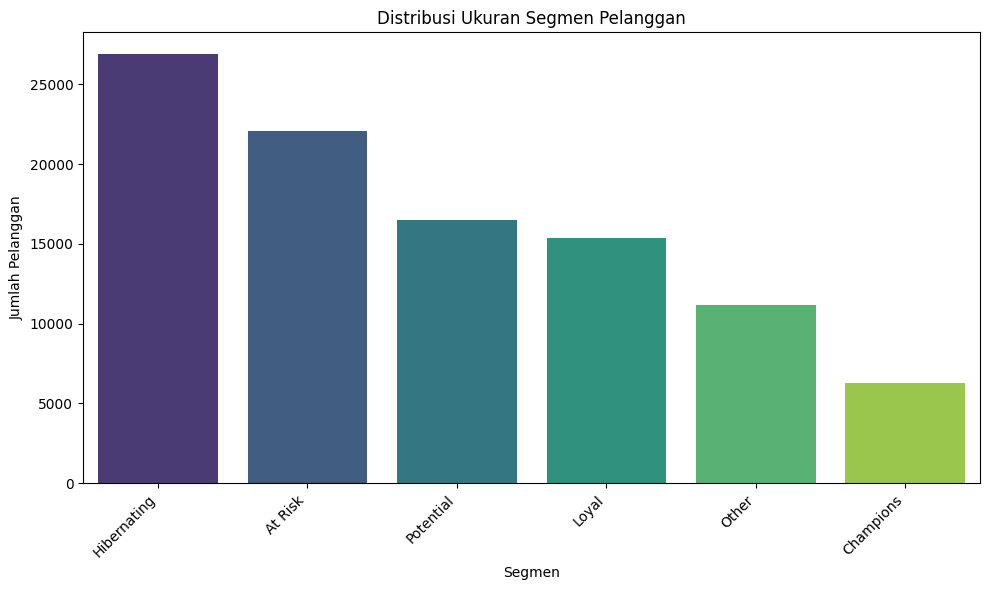

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Jumlah_User', data=segment_table.sort_values('Jumlah_User', ascending=False), palette='viridis')
plt.title('Distribusi Ukuran Segmen Pelanggan')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight:<br>Berdasarkan visualisasi distribusi segmen terlihat bahwa jumlah customer tertinggi terdapat pada segment Hibernating dan setelah itu diikuti oleh At Risk.

## Recency vs Monetary

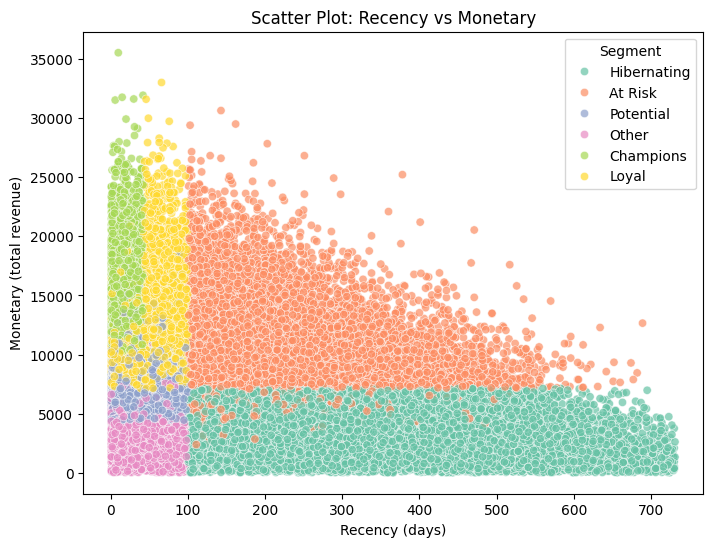

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', data=detail_table, hue='Segment', palette="Set2", alpha=0.7)
plt.title("Scatter Plot: Recency vs Monetary")
plt.xlabel("Recency (days)")
plt.ylabel("Monetary (total revenue)")
plt.show()


##  Average Recency, Frequency, and Monetary

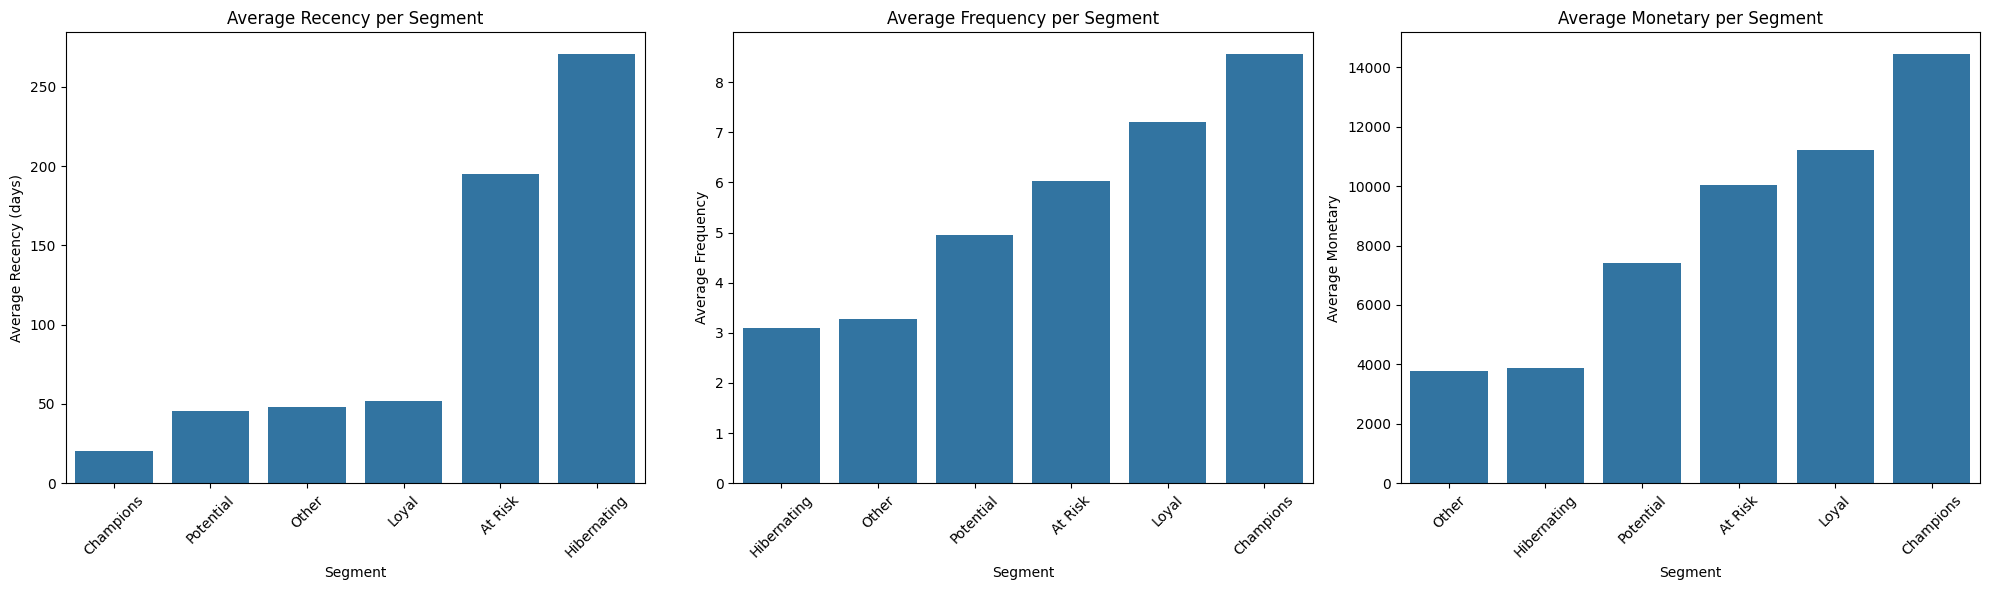

In [ ]:
# Visualize average Recency, Frequency, and Monetary per segment
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(ax=axes[0], x='Segment', y='Avg_Recency', data=summary_table.sort_values('Avg_Recency'))
axes[0].set_title('Average Recency per Segment')
axes[0].set_ylabel('Average Recency (days)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Segment', y='Avg_Frequency', data=summary_table.sort_values('Avg_Frequency'))
axes[1].set_title('Average Frequency per Segment')
axes[1].set_ylabel('Average Frequency')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[2], x='Segment', y='Avg_Monetary', data=summary_table.sort_values('Avg_Monetary'))
axes[2].set_title('Average Monetary per Segment')
axes[2].set_ylabel('Average Monetary')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Visualize segment characteristics

/tmp/ipython-input-424918647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Segment', y='Avg_Recency', data=summary_table.sort_values('Avg_Recency'), palette='viridis')
/tmp/ipython-input-424918647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Segment', y='Avg_Frequency', data=summary_table.sort_values('Avg_Frequency'), palette='viridis')
/tmp/ipython-input-424918647.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='Segment', y='Avg_Monetary', data=summary_table.sort_values('Avg_Mone

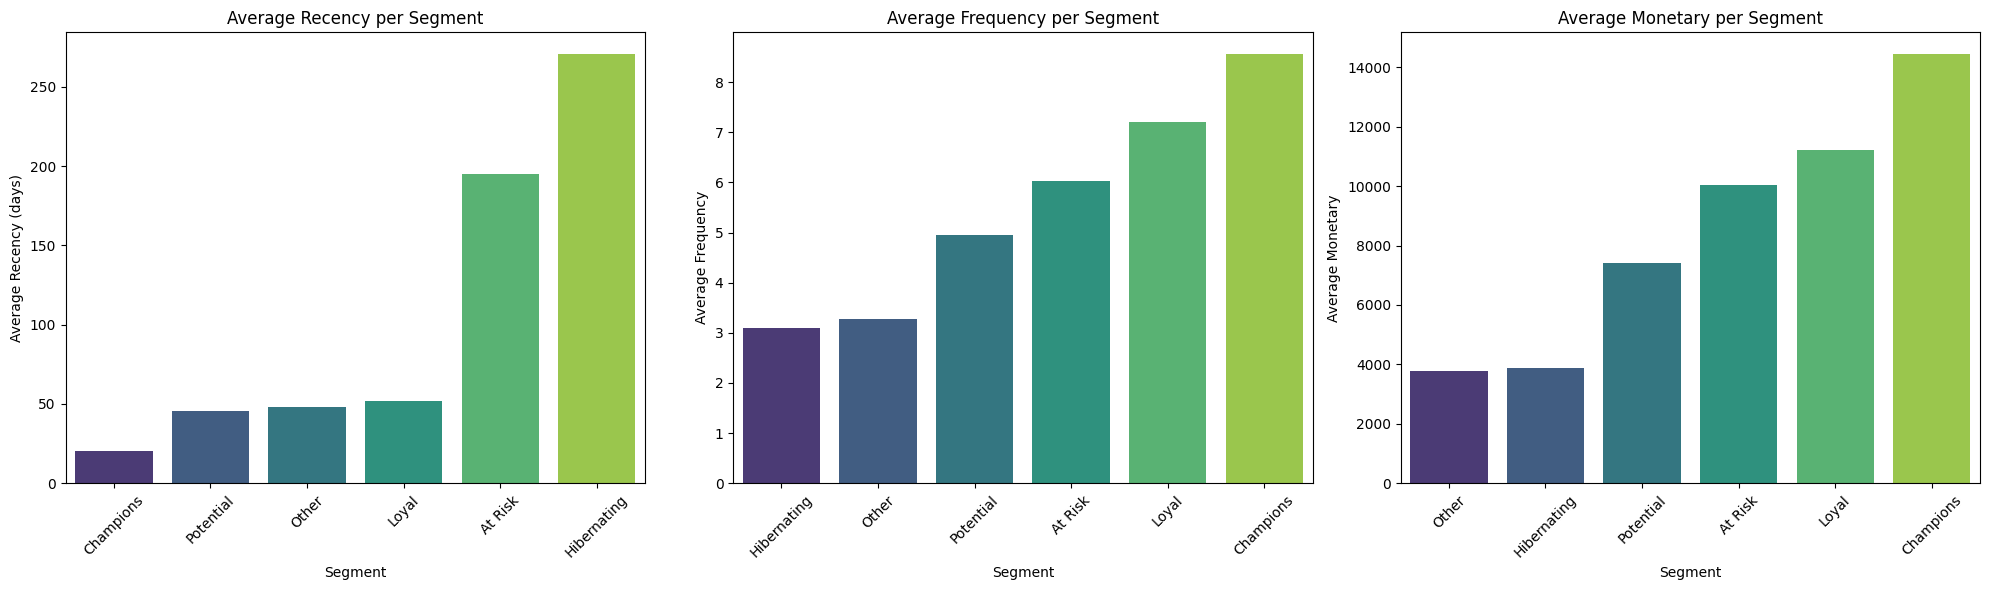

In [ ]:
# Visualize average Recency, Frequency, and Monetary per segment
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(ax=axes[0], x='Segment', y='Avg_Recency', data=summary_table.sort_values('Avg_Recency'), palette='viridis')
axes[0].set_title('Average Recency per Segment')
axes[0].set_ylabel('Average Recency (days)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Segment', y='Avg_Frequency', data=summary_table.sort_values('Avg_Frequency'), palette='viridis')
axes[1].set_title('Average Frequency per Segment')
axes[1].set_ylabel('Average Frequency')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[2], x='Segment', y='Avg_Monetary', data=summary_table.sort_values('Avg_Monetary'), palette='viridis')
axes[2].set_title('Average Monetary per Segment')
axes[2].set_ylabel('Average Monetary')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df.sample(10)

,Transaction Date,Customer ID,Region,Product,Category,Price,Quantity,Discount (%),Total Revenue,Payment Method,TotalSpend
276021,2022-08-10,CUST_57136,Australia,Product_1014,Toys & Games,35.13,1,21.09,27.72,Bank Transfer,35.13
115799,2023-11-02,CUST_11989,Asia,Product_4849,Home & Kitchen,74.76,1,28.23,53.66,Cash,74.76
246726,2023-03-08,CUST_72729,Europe,Product_1932,Fashion,259.95,5,26.52,955.06,Cash,1299.75
487766,2022-01-15,CUST_41213,Asia,Product_6686,Fashion,624.75,4,23.26,1917.73,Credit Card,2499.00
241067,2023-06-20,CUST_47314,South America,Product_6795,Fashion,451.28,5,12.48,1974.80,Credit Card,2256.40
317527,2023-02-02,CUST_4661,South America,Product_3649,Sports & Outdoors,946.39,4,27.61,2740.37,Crypto,3785.56
429410,2023-09-27,CUST_25084,South America,Product_4200,Home & Kitchen,575.92,5,29.66,2025.51,Crypto,2879.60
55583,2023-07-30,CUST_80541,Europe,Product_594,Books,521.80,2,10.43,934.75,PayPal,1043.60
90346,2023-12-30,CUST_4256,North America,Product_8260,Sports & Outdoors,510.98,2,25.16,764.83,PayPal,1021.96
15868,2022-03-24,CUST_52981,Africa,Product_9103,Books,719.93,2,1.75,1414.66,Crypto,1439.86


In [ ]:
detail_table.sample(10)

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
38801,CUST_45512,88,6,14053.80,3,3,4,334,Loyal
6122,CUST_15599,74,11,7233.45,3,4,3,343,Loyal
49657,CUST_55432,99,9,20386.74,3,4,4,344,Loyal
41830,CUST_48286,73,5,8660.74,3,2,3,323,Potential
39721,CUST_46355,214,6,9182.39,1,3,3,133,At Risk
78143,CUST_81505,37,7,6827.31,4,4,2,442,Potential
68122,CUST_72336,139,6,5806.34,2,3,2,232,At Risk
34326,CUST_41411,120,7,8596.01,2,4,3,243,At Risk
87561,CUST_90124,71,8,12078.42,3,4,4,344,Loyal
90433,CUST_92750,8,7,6707.01,4,4,2,442,Potential


In [ ]:
# Menyimpan RFMTable ke file CSV
detail_table.to_csv('RFM_analysis_result.csv', index=False)

print("Data analisis berhasil disimpan dalam file 'RFM_analysis_result.csv'")

Data analisis berhasil disimpan dalam file 'RFM_analysis_result.csv'


In [ ]:
# Menyimpan DataFrame df yang sudah dibersihkan ke file CSV
df.to_csv('cleaned_ecommerce_sales.csv', index=False)

print("DataFrame 'df' berhasil disimpan dalam file 'cleaned_ecommerce_sales.csv'")

DataFrame 'df' berhasil disimpan dalam file 'cleaned_ecommerce_sales.csv'


In [ ]:
# Menyimpan summary_table
summary_table.to_csv('summary_table.csv', index=False)

print("DataFrame 'summary_table' berhasil disimpan dalam file 'summary_table.csv'")

DataFrame 'summary_table' berhasil disimpan dalam file 'summary_table.csv'
